# Netflix Titles

April Meyer

DSC680-T301 Applied Data Science (2215-1)

##### Problem Statement
A report was released in 2018 that showed the number of TV shows on Netflix has almost tripled since 2010, however, movies have decreased by more than 2,000. Movies and TV shows available on Netflix will be my domain for this first project. I want to investigate what other findings can be acquired from their streaming content.   

##### Research Questions
1.	What type of content does Netflix has more of?
2.	What are the top TV shows?
3.	What are the top Movies?
4.	When is the content more likely to be released?
5.	What are the top genres?
6.	How many titles are from books? 
 

##### Dataset
The dataset I will be examining was collected from Flixable they are a third-party Netflix search engine. It contains movies and TV shows that are available on Netflix as of 2019. 
The link to the data is https://www.kaggle.com/shivamb/netflix-shows.   

In [1]:
#all libraries that are need for exercises

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords  
stop_words= stopwords.words('english')

from pandas_profiling import ProfileReport

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\swim_\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\swim_\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
# import into dataframe
netflix_titles = pd.read_csv("netflix_titles.csv")

# the structure of the data frame
netflix_titles.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [3]:
netflix_titles.head(50)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...
5,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,"July 1, 2017",2016,TV-MA,1 Season,"International TV Shows, TV Dramas, TV Mysteries",A genetics professor experiments with a treatm...
6,s7,Movie,122,Yasir Al Yasiri,"Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...",Egypt,"June 1, 2020",2019,TV-MA,95 min,"Horror Movies, International Movies","After an awful accident, a couple admitted to ..."
7,s8,Movie,187,Kevin Reynolds,"Samuel L. Jackson, John Heard, Kelly Rowan, Cl...",United States,"November 1, 2019",1997,R,119 min,Dramas,After one of his high school students attacks ...
8,s9,Movie,706,Shravan Kumar,"Divya Dutta, Atul Kulkarni, Mohan Agashe, Anup...",India,"April 1, 2019",2019,TV-14,118 min,"Horror Movies, International Movies","When a doctor goes missing, his psychiatrist w..."
9,s10,Movie,1920,Vikram Bhatt,"Rajneesh Duggal, Adah Sharma, Indraneil Sengup...",India,"December 15, 2017",2008,TV-MA,143 min,"Horror Movies, International Movies, Thrillers",An architect and his wife move into a castle t...


In [4]:
# Summary statistics for all variables
print("Describe Data")
print(netflix_titles.describe())
print("\nSummarized Data")
print(netflix_titles.describe(include=['O']))

Describe Data
       release_year
count   7787.000000
mean    2013.932580
std        8.757395
min     1925.000000
25%     2013.000000
50%     2017.000000
75%     2018.000000
max     2021.000000

Summarized Data
       show_id   type                title                director  \
count     7787   7787                 7787                    5398   
unique    7787      2                 7787                    4049   
top      s7101  Movie  Discovering Bigfoot  Raúl Campos, Jan Suter   
freq         1   5377                    1                      18   

                      cast        country       date_added rating  duration  \
count                 7069           7280             7777   7780      7787   
unique                6831            681             1565     14       216   
top     David Attenborough  United States  January 1, 2020  TV-MA  1 Season   
freq                    18           2555              118   2863      1608   

            listed_in                     

In [5]:
# replacing missing values with mode for ratings and country
netflix_titles['rating'] = netflix_titles['rating'].fillna(netflix_titles['rating'].mode()[0])
netflix_titles['country'] = netflix_titles['country'].fillna(netflix_titles['country'].mode()[0])
netflix_titles[['rating','country']].isna().sum()

# handling missing release dates
netflix_titles['date_added']=netflix_titles['date_added'].fillna('January 1, {}'.format(str(netflix_titles['release_year'].mode()[0])))

In [ ]:
profile = ProfileReport(netflix_titles, title='Netflix Pandas Profiling Report', explorative = True)
profile.to_widgets()

C:\Users\swim_\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\swim_\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


Text(0, 0.5, 'TV Shows')

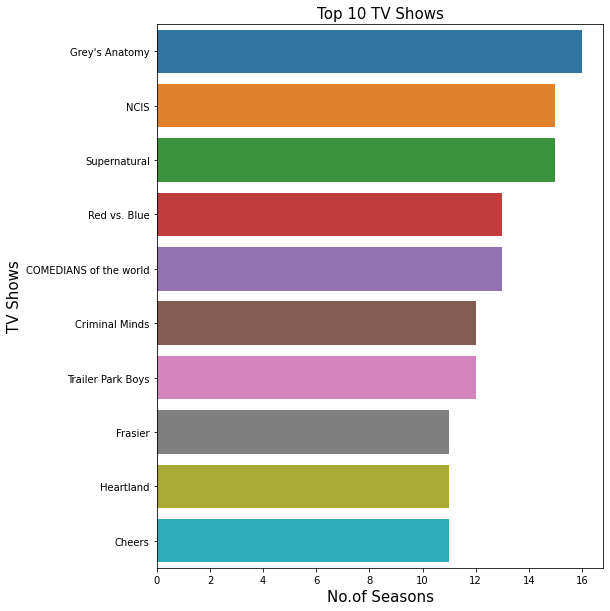

In [8]:
import re
tv_shows = netflix_titles.loc[netflix_titles['type']=='TV Show']

tv_shows['duration'] = tv_shows['duration'].map(lambda x : re.sub('[^0-9]','',x))
tv_shows['duration'] = pd.to_numeric(tv_shows['duration'])

top10_shows = tv_shows.sort_values(by=['duration'])[-1:-11:-1]
top10_shows[['title','duration']]
plt.figure(figsize=(8,10))
sns.barplot(y = top10_shows['title'], x = top10_shows['duration'])
plt.title('Top 10 TV Shows',fontsize = 15)
plt.xlabel('No.of Seasons',fontsize = 15)
plt.ylabel('TV Shows',fontsize = 15)

Text(0, 0.5, 'Genre')

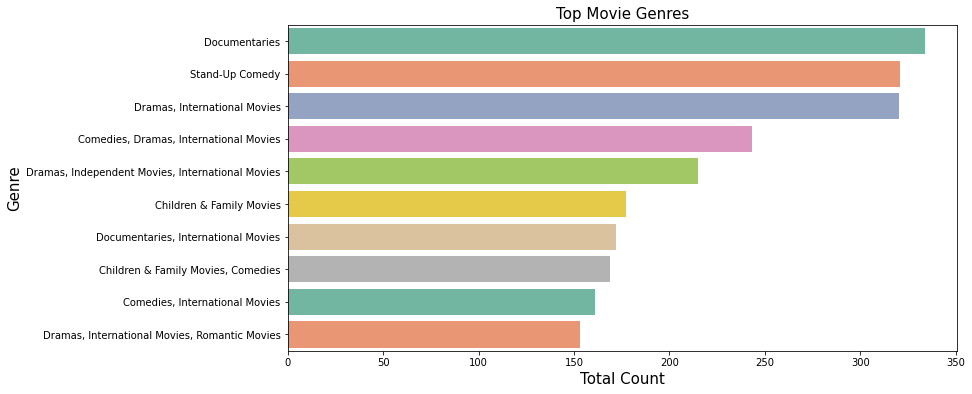

In [11]:
movie_genre = netflix_titles.loc[netflix_titles['type'] == 'Movie']
plt.figure(figsize=(12,6))
ax = sns.countplot(y='listed_in',data = movie_genre,order = movie_genre["listed_in"].value_counts().index[0:10],palette="Set2")
plt.title('Top Movie Genres',fontsize = 15)
plt.xlabel('Total Count',fontsize = 15)
plt.ylabel('Genre',fontsize = 15)

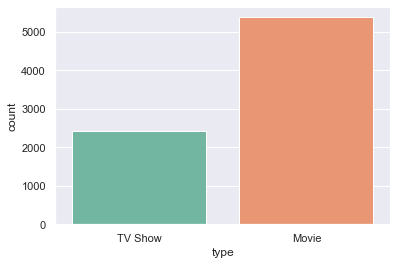

In [6]:
# Movies vs TV Shows
sns.set(style="darkgrid")
ax = sns.countplot(x="type", data=netflix_titles, palette="Set2")

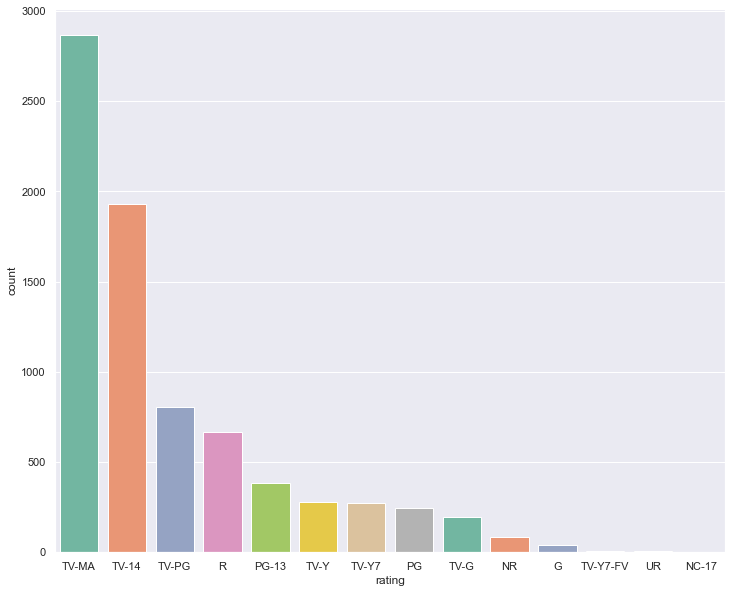

In [7]:
# ratings 
plt.figure(figsize=(12,10))
sns.set(style="darkgrid")
ax = sns.countplot(x="rating", data=netflix_titles, palette="Set2", order=netflix_titles['rating'].value_counts().index[0:15])

Text(0, 0.5, 'Total Count')

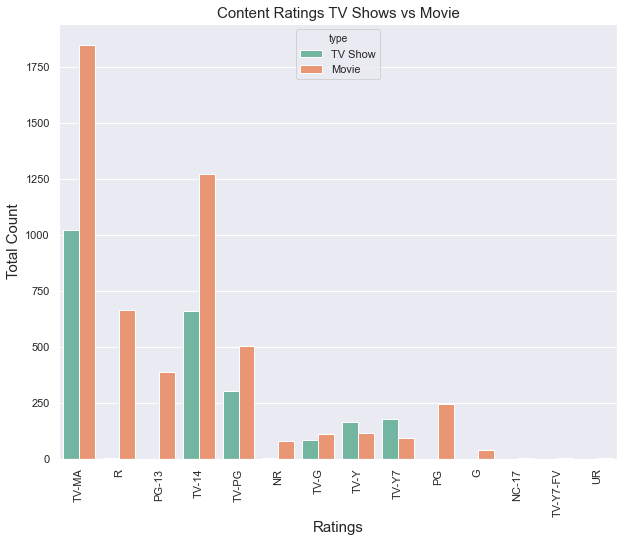

In [8]:
# tv vs movie ratings
sns.set_style(style = 'darkgrid')
plt.figure(figsize = (10,8))
ax = sns.countplot(data = netflix_titles, x= 'rating',hue = 'type', palette='Set2' )
plt.xticks(rotation = 90)
plt.title('Content Ratings TV Shows vs Movie', fontsize = 15)
plt.xlabel('Ratings',fontsize = 15)
plt.ylabel('Total Count',fontsize = 15)

Text(0, 0.5, 'Number of Movies and TV Shows')

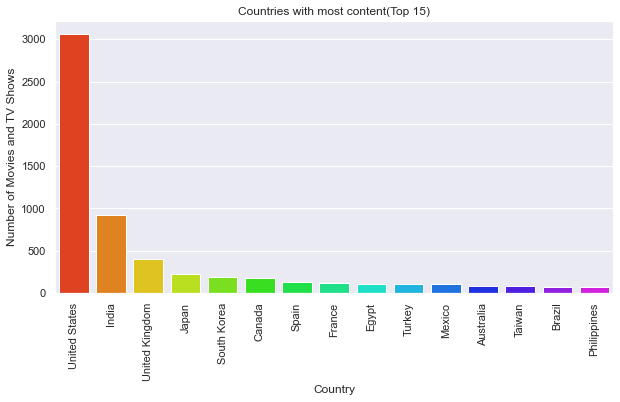

In [9]:
# content by country
plt.figure(figsize = (10,5))
ax = sns.countplot(x = 'country',data= netflix_titles, palette ='gist_rainbow', order = netflix_titles['country'].value_counts().index[0:15])
plt.xlabel('Country')
plt.xticks(rotation = 90)
plt.title('Countries with most content(Top 15)')
plt.ylabel('Number of Movies and TV Shows')

Text(0.5, 0, 'No. of Releases')

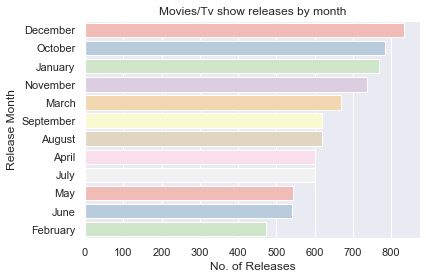

In [10]:
# content by release month

netflix_titles['release_month'] = netflix_titles['date_added'].apply(lambda x: x.lstrip().split(' ')[0])
sns.countplot(y = 'release_month',data = netflix_titles,palette ='Pastel1', order = netflix_titles['release_month'].value_counts().index)
plt.title('Movies/Tv show releases by month')
plt.ylabel('Release Month')
plt.xlabel('No. of Releases')

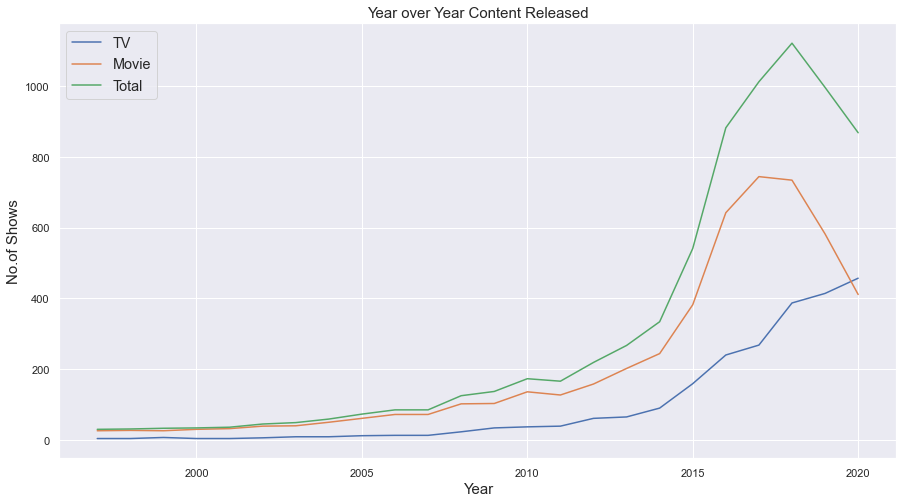

In [11]:
# content released over years
df = netflix_titles[netflix_titles['type'] == 'TV Show'].groupby('release_year').count()[-25:-1]
df1 = netflix_titles[netflix_titles['type'] == 'Movie'].groupby('release_year').count()[-25:-1]
df2 = netflix_titles.groupby('release_year').count()[-25:-1]

plt.figure(figsize = (15,8))
sns.set_style('darkgrid')
sns.lineplot(data = df['show_id'],palette = 'Set1')
sns.lineplot(data = df1['show_id'],palette = 'Set1')
sns.lineplot(data = df2['show_id'],palette = 'Set1')
plt.title('Year over Year Content Released',fontsize = 15)
plt.xlabel('Year',fontsize = 15)
plt.ylabel('No.of Shows',fontsize = 15)
plt.legend(['TV', 'Movie','Total'], fontsize='large')

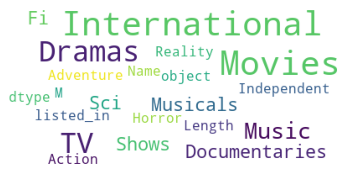

In [12]:
# Count of most used word for listed in
stopwords = set(STOPWORDS)
wordcloud = WordCloud(background_color='white',
                          stopwords=stopwords,
                          max_words=200,
                          max_font_size=40, 
                          random_state=42
                         ).generate(str(netflix_titles['listed_in']))

plt.imshow(wordcloud)
plt.axis('off')
plt.show()

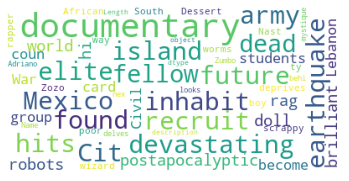

In [13]:
# Count of most used word for description
stopwords = set(STOPWORDS)
wordcloud = WordCloud(background_color='white',
                          stopwords=stopwords,
                          max_words=200,
                          max_font_size=40, 
                          random_state=42
                         ).generate(str(netflix_titles['description']))

plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [25]:
# new feature that we will use to calculate the similarity between movies
netflix_titles['cast']=netflix_titles['cast'].fillna('Unknown')
netflix_titles['director']=netflix_titles['director'].fillna('Unknown')
#combining all fields which will be used for recomendation
netflix_titles['CombinedField']=netflix_titles['cast']+' '+netflix_titles['director']+' '+netflix_titles['listed_in']+' '+netflix_titles['description']
modifiedCOrpus=[]

In [34]:
#tokenizing all words.
corpus = netflix_titles['CombinedField'].apply(lambda x:word_tokenize(x))
listcorpus = list(corpus)
modifiedCOrpus = []
#pre processing words, by lowering it, removing symbolls and removing stop words
for desc in listcorpus:
    stmt = []
    for i in desc:
        if i.lower() not in  stop_words:
            if i.lower() not in ['.',',','â€',':','""']:
                stmt.append(i.lower())
    modifiedCOrpus.append(' '.join(stmt))

In [35]:
tfdifVect = TfidfVectorizer(stop_words='english',lowercase=True)
corpus = modifiedCOrpus
tfdifCorpus =   tfdifVect.fit_transform(corpus)

In [42]:
cossineSim = cosine_similarity(tfdifCorpus,tfdifCorpus)
def get_recommendations(title):
    indices = pd.Series(netflix_titles.index, index=netflix_titles['title']).drop_duplicates()
    try:
        idx = indices[title]
        # Get the pairwsie similarity scores of all movies with that movie
        sim_scores = list(enumerate(cossineSim[idx]))
        sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
        # Get the scores of the 10 most similar movies
        sim_scores = sim_scores[1:11]
        movie_indices = [i[0] for i in sim_scores]
        print(netflix_titles['title'].iloc[movie_indices])
    except:
        print('No such movie found')

In [43]:
get_recommendations('The Umbrella Academy')

6381    The Future of Water
6900          The Staircase
3864       Maharakshak Devi
6056               The 4400
4083    Mighty Little Bheem
3697            Locke & Key
4470            Nightflyers
1284                Charmed
6310      The Dragon Prince
931              Biohackers
Name: title, dtype: object


In [49]:
get_recommendations('Breaking Bad')

858                              Better Call Saul
6865                                     The Show
2656    Have You Ever Fallen in Love, Miss Jiang?
2426                             Girlfriend's Day
7450                               W/ Bob & David
2387                                   Get Shorty
5139                                  Refresh Man
2072                              Extracurricular
5017                          Pyaar Tune Kya Kiya
7022                                   The Writer
Name: title, dtype: object


In [54]:
get_recommendations('Transformers Prime')

7193              Transformers: Robots in Disguise
7195    Transformers: War for Cybertron: Earthrise
412                   All Hail King Julien: Exiled
7194       Transformers: War For Cybertron Trilogy
3463                        Kulipari: Dream Walker
167                            A Fairly Odd Summer
5760                           Spirit: Riding Free
108                       3Below: Tales of Arcadia
3462                    Kulipari: An Army of Frogs
3407              Kipo and the Age of Wonderbeasts
Name: title, dtype: object
